1. 패키지 설치

In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import seaborn as sb

2. 데이터 불러오기 및 확인

"Glass Classification" :

X :  마그네슘(Mg), 알루미늄(Al), 실리콘(Si)

Y : Type(유리의 종류)

In [2]:
df = pd.read_csv('./datasets/glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


3. 데이터 정규화

: 변수들 간 스케일 차이가 클 경우 분산이 큰 변수가 주성분에 과도하게 영향을 많이 주기 때문에 정규화 진행

In [3]:
# 차원축소할 컬럼 선택 (종속변수Type 제거)
df1 = df.drop('Type', axis=1)

# 정규화 
MinMaxScaler = MinMaxScaler()
df_minmax = MinMaxScaler.fit_transform(df1)

# 컬럼명 결합 (데이터프레임으로 만들기)
df_minmax = pd.DataFrame(data=df_minmax, columns=df1.columns)
df_minmax.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0


4. 주성분 생성 및 설명력 확인

주성분 검사 시, 주의 점 : x,y 모두 양적척도이며 독립성+정규성 만족해야함.

주성분은 최대 변수의 개수만큼 만들 수 있다.

In [16]:
# 주성분 생성
pca = PCA(n_components=9)
df_pca = pca.fit_transform(df_minmax)

# 주성분으로 변형된 테이블 생성
df_pca = pd.DataFrame(data=df_pca, columns=['C1','C2','C3','C4','C5','C6','C7','C8','C9'])
# df_pca.head()

# 주성분 설명력 확인
np.round(pca.explained_variance_ratio_ , 3)


array([0.454, 0.18 , 0.126, 0.098, 0.069, 0.042, 0.026, 0.004, 0.   ])

5. 2개의 주성분 생성

In [9]:
# 주성분 개수 설정(2개 설정)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_minmax)

# 주성분으로 변형된 테이블 생성
df_pca = pd.DataFrame(data=df_pca, columns=['C1', 'C2'])

df_pca.head()

,C1,C2
0,-0.402106,0.032707
1,-0.206320,-0.144705
2,-0.188617,-0.194854
3,-0.237208,-0.097064
4,-0.223972,-0.121779


> 각 행은 원래의 데이터포인트(관측치) 나타낸다. <br>
C1과 C2값이 음수인 경우, 해당 관측치는 C1, C2 방향으로 데이터의 변화를 따라간다. C1, C2값이 크면 데이터의 분산을 더 크게 설명하며 C1, C2의 절댓값이 큰 관측치는 C1, C2 방향으로 큰 변화를 나타낸다. 


* 데이터의 변화를 따라간다는 것은 데이터 포인트(관측치)가 주성분 C1과 C2를 기준으로 어떻에 움직이는지 나타냄. 

> 약 63%의 설명력을 가지는 두 개의 주성분까지 생성하여 테이블 생성. (9개->2개로 변수 차원 축소)

6. 주성분에 따른 종속변수 시각화

<Axes: xlabel='C1', ylabel='C2'>

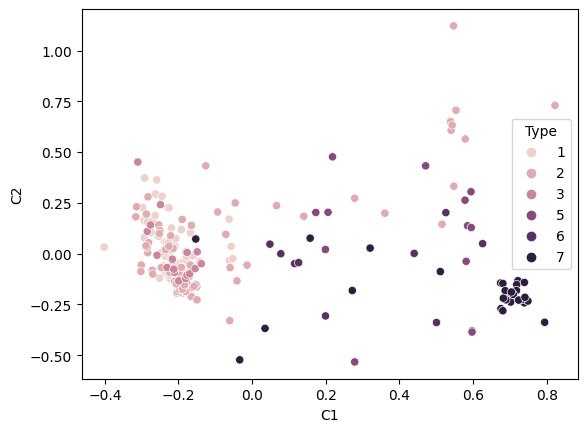

In [18]:
df_concat = pd.concat([df_pca, df[['Type']]], axis=1)

# 산점도 시각화
sb.scatterplot(data=df_concat, x='C1', y='C2', hue='Type')